In [8]:
import pandas as pd
import matplotlib as plt

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

The data set covers a 10-year span (1999–2008).

Hospital admissions in the data set are supposed to be diabetic-related only, but some entries don’t have a diabetes-specific ICD-9 code (250.xx). I suppose that, maybe, such diagnosis was made during readmission, which is the reason for it not to show up sometimes.

Lab tests were performed during admission.

Medications were administered during admission.

Data set contains multiple readmissions of the same people.

Lots of low-variance variables in this data set (e.g. examide and citoglipton have only 1 unique value), which won’t add to the model’s predictive power.

In [3]:
df.shape

(101766, 50)

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [84]:
columns_of_interest = ['number_outpatient', 'number_emergency', 'number_inpatient']
df[columns_of_interest].describe()

,number_outpatient,number_emergency,number_inpatient
count,101766.000000,101766.000000,101766.000000
mean,0.369357,0.197836,0.635566
std,1.267265,0.930472,1.262863
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,42.000000,76.000000,21.000000


# Outpatient

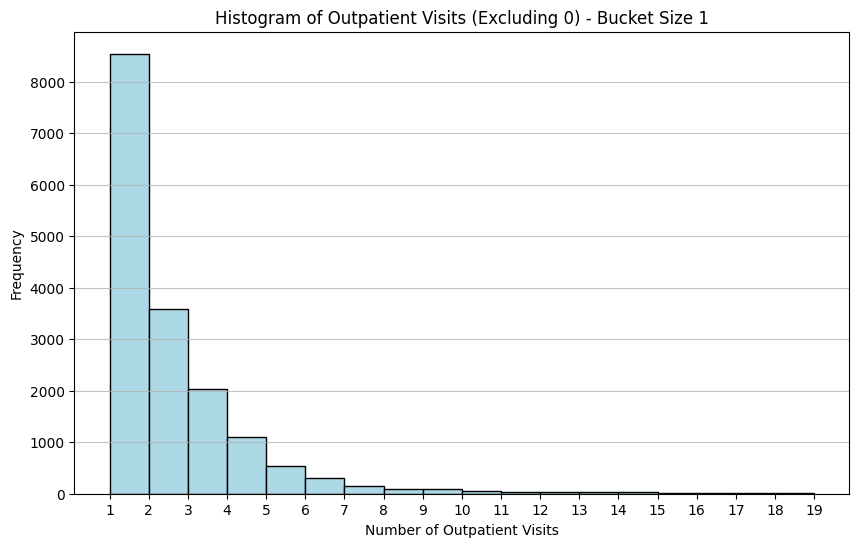

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
outpatient_nonzero = df[df['number_outpatient'] > 0]['number_outpatient']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(outpatient_nonzero, bins=range(int(outpatient_nonzero.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Outpatient Visits (Excluding 0)')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(outpatient_nonzero.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

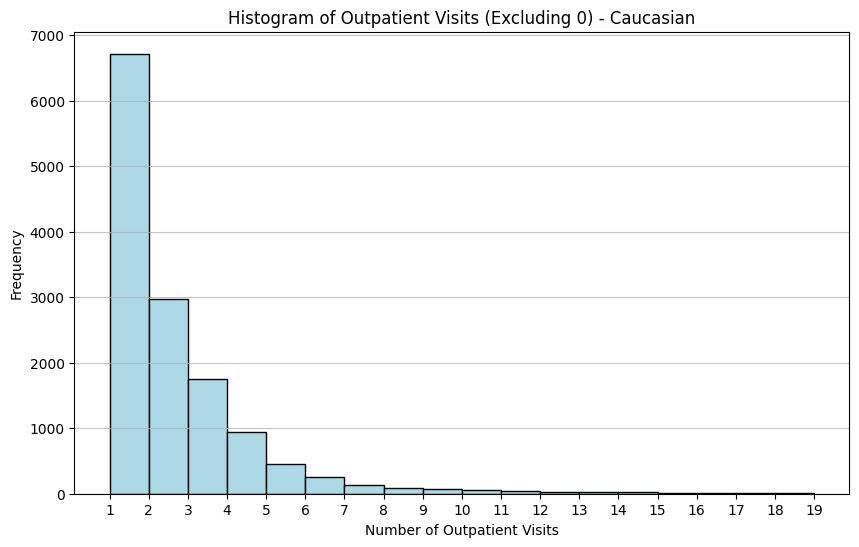

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
outpatient_nonzero_C = df[(df['number_outpatient'] > 0) & (df['race'] == 'Caucasian')]['number_outpatient']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(outpatient_nonzero_C, bins=range(int(outpatient_nonzero_C.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Outpatient Visits (Excluding 0) - Caucasian')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(outpatient_nonzero_C.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

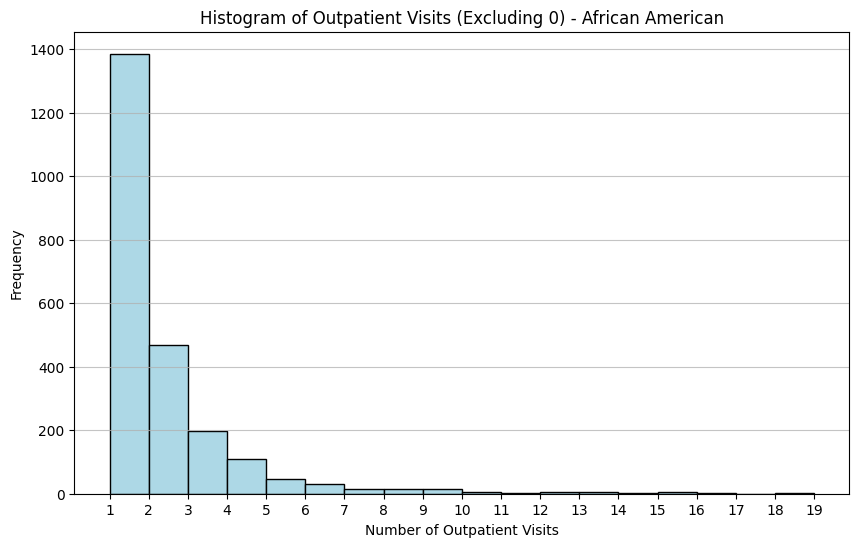

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
outpatient_nonzero_Af = df[(df['number_outpatient'] > 0) & (df['race'] == 'AfricanAmerican')]['number_outpatient']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(outpatient_nonzero_Af, bins=range(int(outpatient_nonzero_Af.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Outpatient Visits (Excluding 0) - African American')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(outpatient_nonzero_Af.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

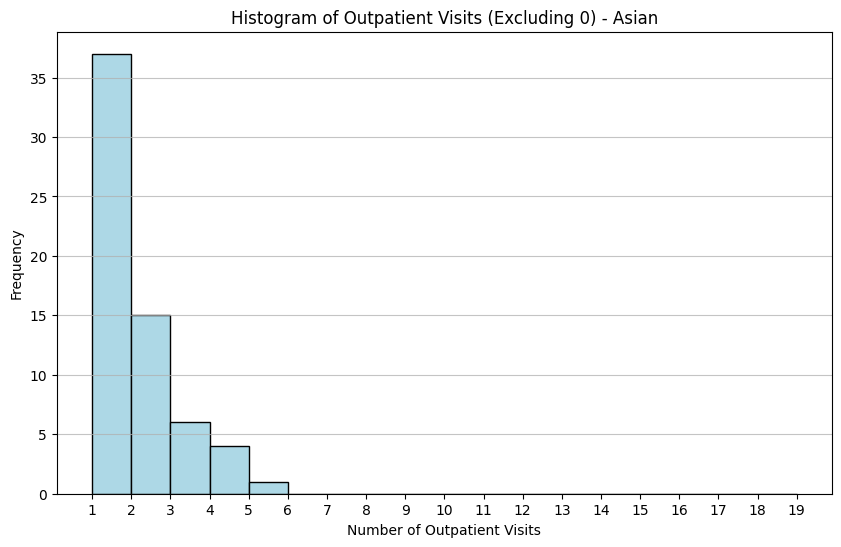

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
outpatient_nonzero_A = df[(df['number_outpatient'] > 0) & (df['race'] == 'Asian')]['number_outpatient']
#outpatient_nonzero_A = df[df['race'] == 'Asian']['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(outpatient_nonzero_A, bins=range(int(outpatient_nonzero_A.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Outpatient Visits (Excluding 0) - Asian')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(outpatient_nonzero_A.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

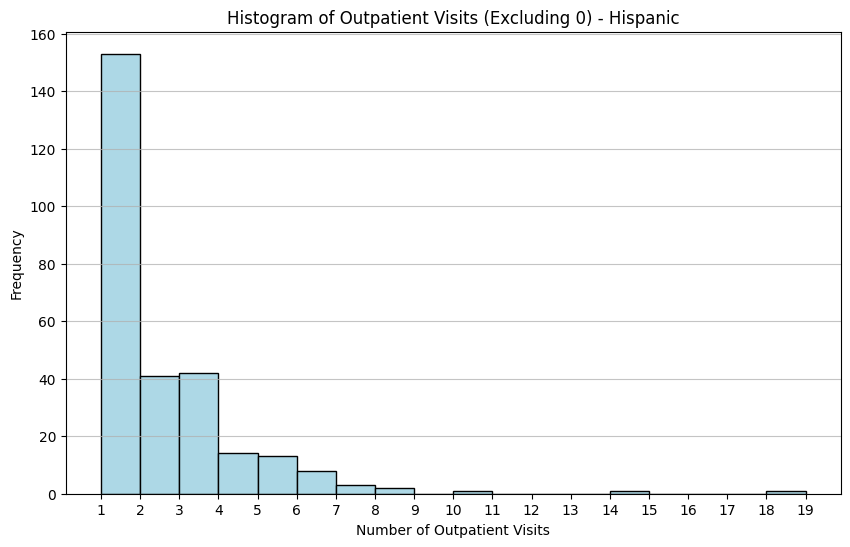

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
outpatient_nonzero_H = df[(df['number_outpatient'] > 0) & (df['race'] == 'Hispanic')]['number_outpatient']
#outpatient_nonzero_H = df[df['race'] == 'Hispanic']['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(outpatient_nonzero_H, bins=range(int(outpatient_nonzero_H.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Outpatient Visits (Excluding 0) - Hispanic')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(outpatient_nonzero_H.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

# Emergency

/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7093: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


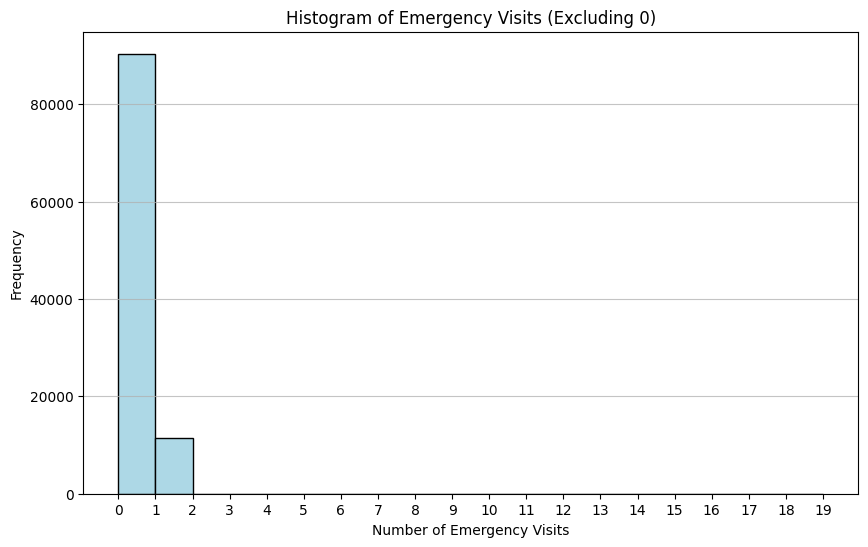

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
emergency_nonzero = df['number_emergency'] > 0

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(emergency_nonzero, bins=range(int(emergency_nonzero.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Emergency Visits (Excluding 0)')
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(emergency_nonzero.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

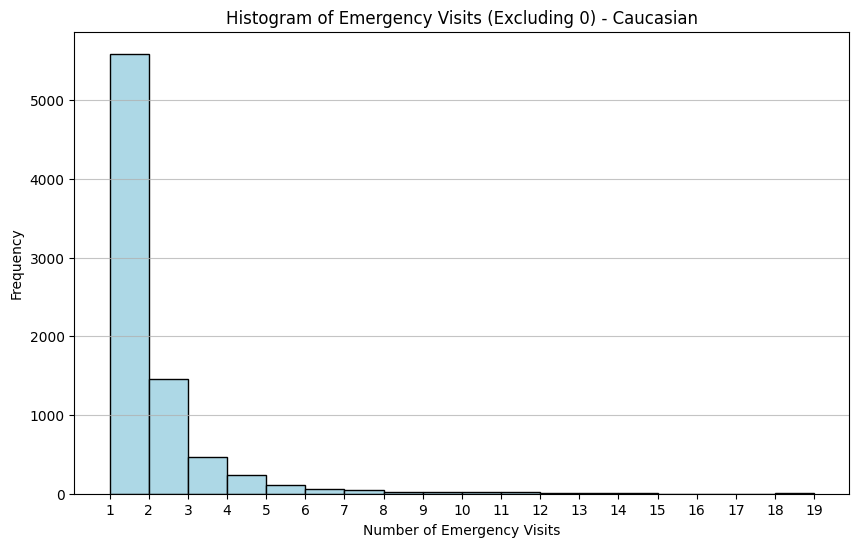

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
emergency_nonzero_C = df[(df['number_emergency'] > 0) & (df['race'] == 'Caucasian')]['number_emergency']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(emergency_nonzero_C, bins=range(int(emergency_nonzero_C.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Emergency Visits (Excluding 0) - Caucasian')
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(emergency_nonzero_C.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

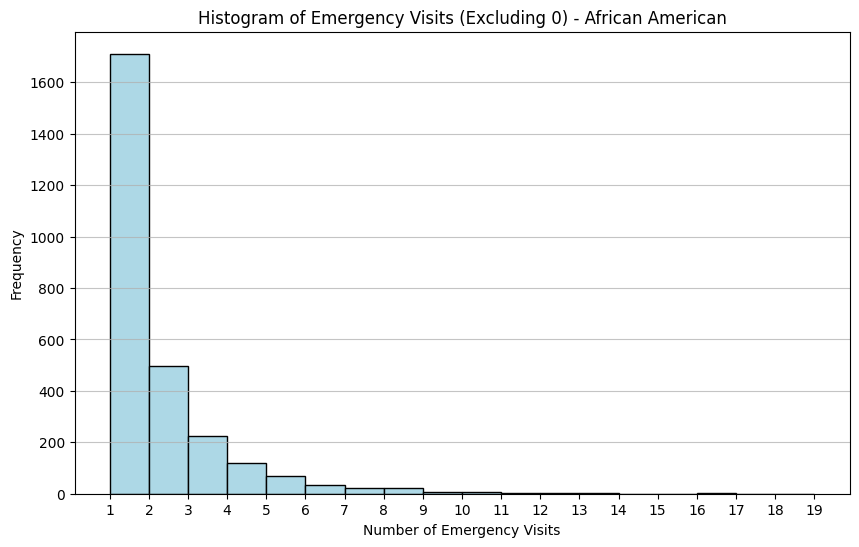

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
emergency_nonzero_Af = df[(df['number_emergency'] > 0) & (df['race'] == 'AfricanAmerican')]['number_emergency']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(emergency_nonzero_Af, bins=range(int(emergency_nonzero_Af.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Emergency Visits (Excluding 0) - African American')
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(emergency_nonzero_Af.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

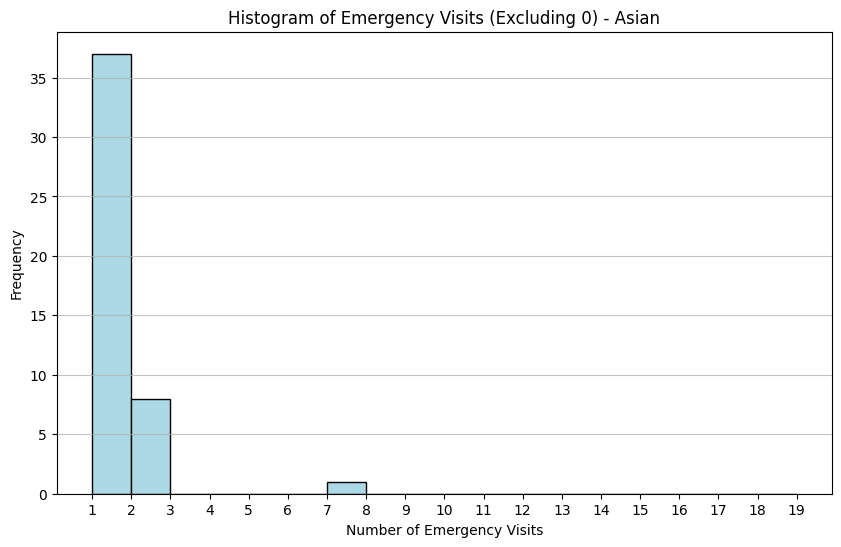

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
emergency_nonzero_A = df[(df['number_emergency'] > 0) & (df['race'] == 'Asian')]['number_emergency']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(emergency_nonzero_A, bins=range(int(emergency_nonzero_A.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Emergency Visits (Excluding 0) - Asian')
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(emergency_nonzero_A.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

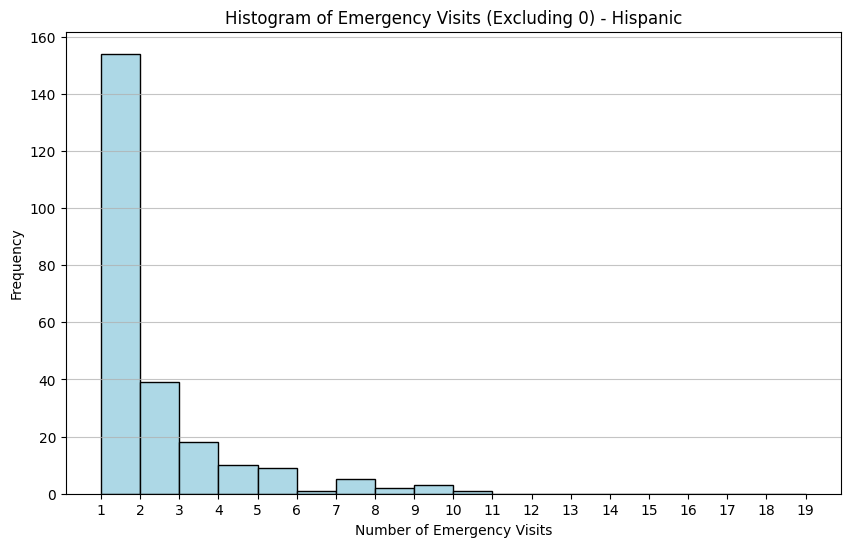

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'number_outpatient' is the column
emergency_nonzero_H = df[(df['number_emergency'] > 0) & (df['race'] == 'Hispanic')]['number_emergency']
#outpatient = df['number_outpatient']

# Create the histogram with buckets of size one
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(emergency_nonzero_H, bins=range(int(emergency_nonzero_H.min()), 20),
         edgecolor='black', color='lightblue')  # Create histogram

plt.title('Histogram of Emergency Visits (Excluding 0) - Hispanic')
plt.xlabel('Number of Emergency Visits')
plt.ylabel('Frequency')
plt.xticks(range(int(emergency_nonzero_H.min()), 20)) # Ensure all integer values on x-axis
plt.grid(axis='y', alpha=0.75)  # Add gridlines for better readability
plt.show()

# Conclusions

In [76]:
unique_count = df['patient_nbr'].nunique()

print(unique_count)

71518


In [77]:
grouping = df.groupby('race')['encounter_id'].count()

grouping

,encounter_id
race,
AfricanAmerican,19210
Asian,641
Caucasian,76099
Hispanic,2037


In [78]:
race_nan = ['Other', '?']
df_clean = df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values=race_nan)

df_clean

<ipython-input-78-c7dcab9fc718>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values=race_nan)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [79]:
clean_grouping = df_clean.groupby('race')['encounter_id'].count()

clean_grouping

,encounter_id
race,
AfricanAmerican,19210
Asian,641
Caucasian,76099
Hispanic,2037


In [80]:
clean_grouping_sum = df_clean.groupby('race')[['number_outpatient', 'number_emergency', 'number_inpatient']].sum()

clean_grouping_sum

,number_outpatient,number_emergency,number_inpatient
race,,,
AfricanAmerican,4609,5014,13481
Asian,106,60,309
Caucasian,31384,14130,48265
Hispanic,661,465,1245


In [81]:
# Group by race and calculate the mean for the number of visits
clean_grouping = df_clean.groupby('race')[['number_outpatient', 'number_emergency', 'number_inpatient']].mean()

print(clean_grouping)

                 number_outpatient  number_emergency  number_inpatient
race                                                                  
AfricanAmerican           0.239927          0.261010          0.701770
Asian                     0.165367          0.093604          0.482059
Caucasian                 0.412410          0.185679          0.634240
Hispanic                  0.324497          0.228277          0.611193


In [89]:
clean_grouping.describe()

,number_outpatient,number_emergency,number_inpatient
count,4.000000,4.000000,4.000000
mean,0.285550,0.192142,0.607315
std,0.106671,0.072572,0.091925
min,0.165367,0.093604,0.482059
25%,0.221287,0.162660,0.578910
50%,0.282212,0.206978,0.622716
75%,0.346475,0.236460,0.651122
max,0.412410,0.261010,0.701770


In [82]:
# Change DataFrame to long format
clean_grouping_melted = clean_grouping.reset_index().melt(
    id_vars='race',
    value_vars=['number_outpatient', 'number_inpatient', 'number_emergency'],
    var_name='level_of_care',
    value_name='mean_value'
)

clean_grouping_melted

,race,level_of_care,mean_value
0,AfricanAmerican,number_outpatient,0.239927
1,Asian,number_outpatient,0.165367
2,Caucasian,number_outpatient,0.412410
3,Hispanic,number_outpatient,0.324497
4,AfricanAmerican,number_inpatient,0.701770
5,Asian,number_inpatient,0.482059
6,Caucasian,number_inpatient,0.634240
7,Hispanic,number_inpatient,0.611193
8,AfricanAmerican,number_emergency,0.261010
9,Asian,number_emergency,0.093604


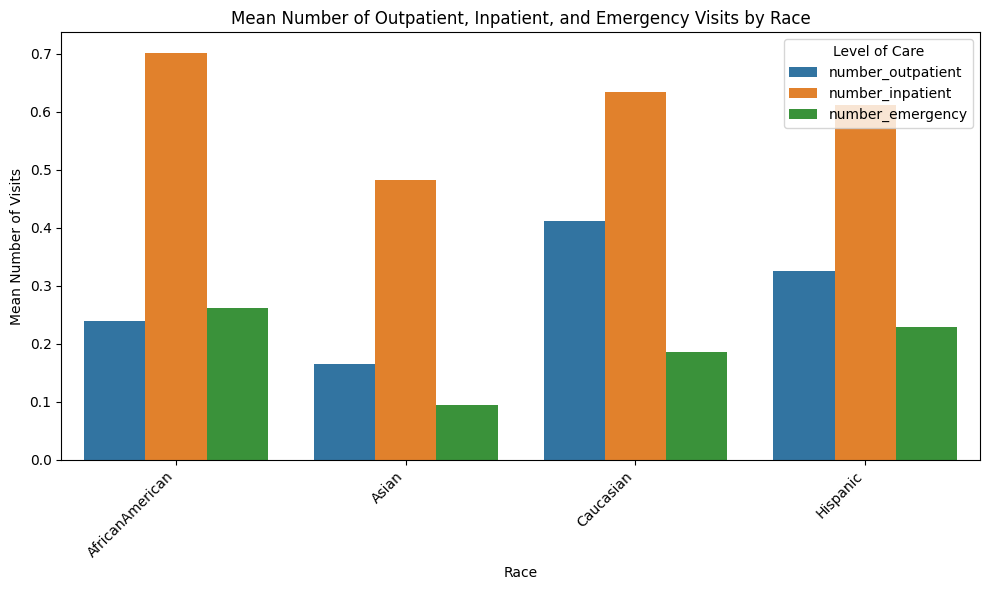

In [83]:
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='mean_value', hue='level_of_care', data=clean_grouping_melted)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Mean Number of Visits')
plt.title('Mean Number of Outpatient, Inpatient, and Emergency Visits by Race')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Level of Care')
plt.tight_layout()
plt.show()

# Big Conclusion

I was interested in seeing patterns regarding race and level of care. Especially, does more outpatient care lead to fewer emergency and inpatient incidents.

*   There are a good number of datapoints for each racial group and we find similar distributions of number of visits in level of cares
*   Asian as a racial category appear to be by far the least prone to diabetes - which may be explainable by income, diet, level of exercise, etc.
*   African American as a racial category show higher emergency visits and higher inpatient visits - probably an effect of more emergency visits.
*   An interesting finding is that outpatient visits are highest in Caucasian racial category, perhaps explained by higher trust in healthcare, but this doesn't seem to lead to fewer inpatient incidents.

All this motivates hypothesis testing.